# FEM Beispiel: Poisson Gleichung

#####  Zur Verfügung gestellt vom Institut für Mechanik der Montanuniversität Leoben 
#####  Kontakt für Fragen und Anmerkungen: wolfgang.flachberger@stud.unileoben.ac.at

## Einführung

Im Folgenden soll die Poisson Gleichung in einem zweidimensionalen Bereich unter Verwendung der Methode der Finiten Elemente näherungsweise gelöst werden. Die Poisson Gleichung tritt in der Physik unter anderem bei stationären Wärmeleitungsproblemen auf. Für die Mechanik ist sie insbesondere relevant da sie verwendet werden kann um die Absenkung einer Membran unter bestimmten Belastungen zu ermitteln. Eine weitere Anwendung der Poisson Gleichung ist die Bestimmung von Schubspannungen zufolge Torsion in einem Träger mit beliebigen Querschnitt (siehe Mechnik IA Skriptum). Letzteres werden wir hier für einen Träger mit quadratischem Querschnitt bestimmen. Unter Anwendung des Ritz'schen Verfahrens soll ein lineares Gleichungssystem aufgestellt werden, welches die Eigenschaften der Poisson Gleichung beschreibt:

$$ \Delta u(\underline{x}) + q(\underline{x}) = 0 \;\; \longrightarrow \;\;  \text{FEM-Analyse}  \;\; \longrightarrow \;\; \underline{\underline{K}} \; \underline{U} = \underline{F} $$ 

Unter Verwendung passender Ansatzfunktionen $h_i(\underline{x})$ kann dann mithilfe des Lösungsvektors $ \underline{U} = (u_0, u_1,.. u_i, .. u_n)^\top $ eine kontinuierliche Näheungslösung angegeben werden: 

$$ u(\underline{x})\approx \sum_{i=1}^{n} u_i h_i(\underline{x}) $$

Für das Torsionsproblem wird $q=2$ gewählt (siehe Mechnik IA Skriptum).

## Analytische Vorarbeit

Ausgangspunkt ist die Integrale Form der Poisson Gleichung mit $\nu(\underline{x})$ als Testfuntion:

$$  \int_{\Omega} \nabla^2 u \; \nu \; dA = - \int_{\Omega} q \; \nu \; dA $$

Offensichtlich ist die Ordnung der Operatorgleichung gleich 2. Daraus folgt, dass die Integrale Form einmal partiell integriert werden muss um die natürlichen (Neumann) Randbedingungen zu berücksichtigen und das Ritz'sche Verfahren anzuwenden: 

$$ \int_{\partial \Omega} ( \nu \; \nabla u ) \cdot \underline{n}_{\partial \Omega}  \; ds - \int_{\Omega} \nabla u \; \cdot \nabla \nu \; dA = - \int_{\Omega} q \; \nu \; dA $$

Offensichtlich verschwindet das Randintegral bei Auswertung da Testfunktionen die Eigenschaft besitzen, dass sie am Rand des Definitionsbereiches den Wert Null annehmen. Nach substituion der Näherungslösung und der Wahl von $ \nu(\underline{x}) = h(\underline{x}) $ (Testfunktionen dürfen beliebig gewählt werden) erhält man das folgende Gleichungssystem: 

$$ \sum_{i=1}^{e} u_i \int_{\Omega^{(e)}} \nabla h_{i} \cdot \nabla h_{j} \; dx = \int_{\Omega^{(e)}} h_{j} \; q \; dx $$

Oder in Matrixschreibweise: 

$$ \underline{\underline{k}}_{}^{(e)}  \underline{u}_{}^{(e)} = \underline{f}_{}^{(e)} $$

wobei, 

$$ \underline{\underline{k}}_{}^{(e)} = \int_{\Omega^{(e)}} \nabla h_{i} \cdot \nabla h_{j} \; dx $$ 
$$ \underline{f}_{}^{(e)} = \int_{\Omega^{(e)}} h_{j} \; q \; dx $$



## Element-Typ und Ansatzfunktionen

Um Elementsteifigkeitsmatrix und Elementlastvektor explizit angeben zu können muss zuerst ein geeigneter Element-Typ mit passenden Ansatzfunktionen gewählt werden. Für zwei dimensionale Problemstellungen hat man die Wahl zwischen dreiecks- und vierecks-Elementen verschiedener Ordnung. Wir entscheiden uns für viereckige Elemente mit linearen Ansatzfunktionen und daher vier Knoten (diese können als das zweidimensionale Pendant zu linearen stabelementen verstanden werden). Da die Ansatzfunktionen beim Ritz'sche Verfahren für die Poisson Gleichung nur einmal differenziert werden müssen genügt dieser einfache Element-Typ.

In [1]:
import numpy
import sympy

l = 2 # länge des elements 

XI = numpy.asarray(sympy.symbols('xi:' + str(2))) # symbolischer vector mit lokalen koordinaten

def interpolationFunctions(XI, l): 

        h = sympy.ones(4,1) # initialisiere symbolischen spaltenvektor für ansatzfunktionen
         
        # ansatzfunktionen: eine für jeden knoten
        h[0] = ( 1 - XI[0] * 2/l )*( 1 - XI[1] * 2/l )/4
        h[1] = ( 1 - XI[0] * 2/l )*( 1 + XI[1] * 2/l )/4
        h[2] = ( 1 + XI[0] * 2/l )*( 1 - XI[1] * 2/l )/4
        h[3] = ( 1 + XI[0] * 2/l )*( 1 + XI[1] * 2/l )/4

        return h
    
h = interpolationFunctions(XI, l)  


# ausgabe
from IPython.display import display
sympy.init_printing()
print("local coordinates:")
print("------------------")    
for i in range(len(XI)):
    display(XI[i])
print("interpolation functions:")
print("------------------------")    
display(h)

local coordinates:
------------------


interpolation functions:
------------------------


⎡(1 - ξ₀)⋅(1 - ξ₁)⎤
⎢─────────────────⎥
⎢        4        ⎥
⎢                 ⎥
⎢(1 - ξ₀)⋅(ξ₁ + 1)⎥
⎢─────────────────⎥
⎢        4        ⎥
⎢                 ⎥
⎢(1 - ξ₁)⋅(ξ₀ + 1)⎥
⎢─────────────────⎥
⎢        4        ⎥
⎢                 ⎥
⎢(ξ₀ + 1)⋅(ξ₁ + 1)⎥
⎢─────────────────⎥
⎣        4        ⎦

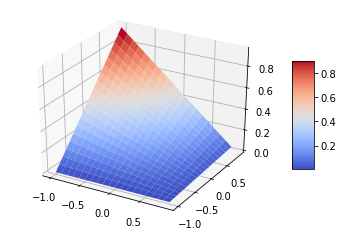

In [2]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

X = numpy.arange(-1, 1, 0.1)
Y = numpy.arange(-1, 1, 0.1)
X, Y = numpy.meshgrid(X, Y)
Z = ( 1 - X )*( 1 + Y )/4

# Visualization
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [3]:
def interpolationFunctionsDerivatives(XI, h):
        """ interpolationfunction[node, derivativeaxis] """
        dh_dX = sympy.ones(4, 2) 
        for index in range(4): 
            for axis in range(2):
                dh_dX[index,axis] = sympy.diff(h[index], XI[axis]) 
        return dh_dX 
    
dh_dx = interpolationFunctionsDerivatives(XI, h)

print("derivatives of interpolation functions:")
print("---------------------------------------")    
display(dh_dx)

derivatives of interpolation functions:
---------------------------------------


⎡ ξ₁   1    ξ₀   1 ⎤
⎢ ── - ─    ── - ─ ⎥
⎢ 4    4    4    4 ⎥
⎢                  ⎥
⎢  ξ₁   1   1   ξ₀ ⎥
⎢- ── - ─   ─ - ── ⎥
⎢  4    4   4   4  ⎥
⎢                  ⎥
⎢ 1   ξ₁     ξ₀   1⎥
⎢ ─ - ──   - ── - ─⎥
⎢ 4   4      4    4⎥
⎢                  ⎥
⎢ ξ₁   1    ξ₀   1 ⎥
⎢ ── + ─    ── + ─ ⎥
⎣ 4    4    4    4 ⎦

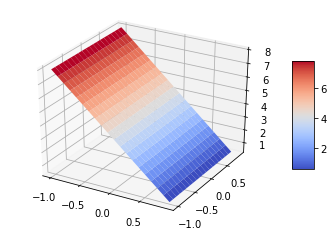

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = numpy.arange(-1, 1, 0.1)
Y = numpy.arange(-1, 1, 0.1)
X, Y = numpy.meshgrid(X, Y)
Z = (-X + 1) * 4

# Visualization
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### Initialisation of the mesh

In [5]:
""" Definiere mesh """ 

domain = [(0,1),(0,1)] 
resolution = 0.1


import numpy 

dimension = 2
nodes_per_element = 4
nr_el_dim = [] # initialize list with number of elements necessary per axis
nr_nd_dim = [] # initialize list with number of nodes necessary per axis
for index in range(dimension): # for every dimension
    length = domain[index][1] - domain[index][0] # take length of "box"
    nr_el_dim.append(int(length/resolution)) # approximate the domain (division without remainder)
    nr_nd_dim.append(nr_el_dim[index] + 1)
    pass
nr_el_dim = tuple(nr_el_dim)
nr_nd_dim = tuple(nr_nd_dim)
number_elements = numpy.prod(nr_el_dim) # total amount of elements
DoF = numpy.prod(nr_nd_dim) # total amount of gloabal nodes (= DoFs)

print("Total number of elements used :",number_elements)
print("Total number of global nodes :", DoF)

Total number of elements used : 100
Total number of global nodes : 121


We now know how many elements and nodes there are and how many elements we need to stack upon each other in each axis direction. The next step is to assign a number to every degree of freedom (node) and arrange the numbers in the same way the corresponding nodes are arranged in the mesh. It is then easy to find the name (number) of a node as the the elements of the mesh and the numbering array have corresponding indices.

In [6]:
# initialize a list-array: 0, 1, 2,..
nodes = numpy.arange(DoF,dtype=int)

# as it is not important how we call each node we can simply reshape "nodes"
node_names_global = numpy.reshape(nodes,(nr_nd_dim),order='C')

print(node_names_global)


[[  0   1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20  21]
 [ 22  23  24  25  26  27  28  29  30  31  32]
 [ 33  34  35  36  37  38  39  40  41  42  43]
 [ 44  45  46  47  48  49  50  51  52  53  54]
 [ 55  56  57  58  59  60  61  62  63  64  65]
 [ 66  67  68  69  70  71  72  73  74  75  76]
 [ 77  78  79  80  81  82  83  84  85  86  87]
 [ 88  89  90  91  92  93  94  95  96  97  98]
 [ 99 100 101 102 103 104 105 106 107 108 109]
 [110 111 112 113 114 115 116 117 118 119 120]]


### The coincidence table

In [7]:
def coincidenceTable(number_elements, nodes_per_element, dimension, nr_el_dim, node_names_global): 
        """ coincidence_table[element,node] """
        
        # initialize coincidence table array 
        coincidence_table = numpy.zeros((number_elements,nodes_per_element), dtype=int, order='C')
        
        i = 0 # set row count to zero
        for element_indices in numpy.ndindex(nr_el_dim): # for every element
            j = 0 # set local node count to zero
            for node_indices in numpy.ndindex((2,)*dimension): # for every local node in elmenet
                location = tuple([sum(x) for x in zip(element_indices,node_indices)])# find global location of node
                coincidence_table[i,j] = node_names_global[location] # put node name to table
                j += 1 # next element in row
                pass
            i += 1 # next row
            pass
        return coincidence_table    

T = coincidenceTable(number_elements, nodes_per_element, dimension, nr_el_dim, node_names_global)
print(T)   

[[  0   1  11  12]
 [  1   2  12  13]
 [  2   3  13  14]
 [  3   4  14  15]
 [  4   5  15  16]
 [  5   6  16  17]
 [  6   7  17  18]
 [  7   8  18  19]
 [  8   9  19  20]
 [  9  10  20  21]
 [ 11  12  22  23]
 [ 12  13  23  24]
 [ 13  14  24  25]
 [ 14  15  25  26]
 [ 15  16  26  27]
 [ 16  17  27  28]
 [ 17  18  28  29]
 [ 18  19  29  30]
 [ 19  20  30  31]
 [ 20  21  31  32]
 [ 22  23  33  34]
 [ 23  24  34  35]
 [ 24  25  35  36]
 [ 25  26  36  37]
 [ 26  27  37  38]
 [ 27  28  38  39]
 [ 28  29  39  40]
 [ 29  30  40  41]
 [ 30  31  41  42]
 [ 31  32  42  43]
 [ 33  34  44  45]
 [ 34  35  45  46]
 [ 35  36  46  47]
 [ 36  37  47  48]
 [ 37  38  48  49]
 [ 38  39  49  50]
 [ 39  40  50  51]
 [ 40  41  51  52]
 [ 41  42  52  53]
 [ 42  43  53  54]
 [ 44  45  55  56]
 [ 45  46  56  57]
 [ 46  47  57  58]
 [ 47  48  58  59]
 [ 48  49  59  60]
 [ 49  50  60  61]
 [ 50  51  61  62]
 [ 51  52  62  63]
 [ 52  53  63  64]
 [ 53  54  64  65]
 [ 55  56  66  67]
 [ 56  57  67  68]
 [ 57  58  6

### Definieren des Variationsproblems

In [8]:
""" input skript """ 

def q(X):
    x0 = X[0]
    x1 = X[1]
    return 2


# definiere rand
def boundary(X_b): 
    xb0 = X_b[0]
    xb1 = X_b[1]
    
    b11 = xb0
    b12 = 0.0
    
    b21 = xb0 - 1.0
    b22 = 0.0
    
    b31 = 0.0
    b32 = xb1
    
    b41 = 0.0
    b42 = xb1 - 1.0
    
    return [[b11, b12],[b21, b22],[b31, b32],[b41, b42]]


# definiere randwerte
def boundaryValue(X_b): 
    xb0 = X_b[0]
    xb1 = X_b[1]
    return 0 

In [9]:

X = numpy.asarray(sympy.symbols('x:' + str(dimension)))
dv_dx = numpy.asarray(sympy.symbols('v_x:' + str(dimension)))
du_dx = numpy.asarray(sympy.symbols('u_x:' + str(dimension)))

# Operatorgleichung
Au = numpy.dot( du_dx, dv_dx )  

# ausgabe
equation = sympy.Eq(Au + q(X), 0)
print("Resultierendes Variationsproblem :")
print("----------------------------------")
display(equation)

Resultierendes Variationsproblem :
----------------------------------


### ESM and ELV

In [10]:
# ansatzfunktionen und deren ableitungen
h = interpolationFunctions(XI, resolution)  
dh_dx = interpolationFunctionsDerivatives(XI, h)


def elementStiffnessMatrixAnalytic(Au, dv_dx, du_dx, h, dh_dx, X, XI, nodes_per_element, dimension, resolution): 
    
    k_ij = sympy.zeros(nodes_per_element,nodes_per_element)
    for i in range(nodes_per_element): 
        for j in range(nodes_per_element):
            k_ij[i,j] = Au.subs([(du_dx[0], dh_dx[i,0]), (du_dx[1], dh_dx[i,1]), (dv_dx[0], dh_dx[j,0]), (dv_dx[1], dh_dx[j,1])])   
    
    # prepare substitution for coordinate transformation
    x_to_xi = []
    for j in range(dimension):
        x_to_xi.append( (X[j], XI[j] + X[j]) )
    
    # transform to local coordinate frame and integrate
    for indices in numpy.ndindex(k_ij.shape):  
        k_ij[indices] = k_ij[indices].subs(x_to_xi)    
        for i in range(dimension): 
            k_ij[indices] = sympy.integrate(k_ij[indices],(XI[i],-resolution/2,resolution/2))
    
    return k_ij

k_ij = elementStiffnessMatrixAnalytic(Au, dv_dx, du_dx, h, dh_dx, X, XI, nodes_per_element, dimension, resolution)
display(k_ij)   

⎡0.666666666666667   -0.166666666666667  -0.166666666666667  -0.33333333333333
⎢                                                                             
⎢-0.166666666666667  0.666666666666667   -0.333333333333333  -0.16666666666666
⎢                                                                             
⎢-0.166666666666667  -0.333333333333333  0.666666666666667   -0.16666666666666
⎢                                                                             
⎣-0.333333333333333  -0.166666666666667  -0.166666666666667  0.666666666666667

3⎤
 ⎥
7⎥
 ⎥
7⎥
 ⎥
 ⎦

In [11]:
def elementLoadVectorAnalytic(h, q, X, XI, nodes_per_element, dimension, resolution): 
        
    f_j = h * q(X)
        
    # prepare substitution for transformation
    x_to_xi = []
    for j in range(dimension):
        x_to_xi.append( (X[j], XI[j] + X[j]) )
        
    # transform and integrate
    for j in range(nodes_per_element):  
        f_j[j] = f_j[j].subs(x_to_xi)    
        for dim in range(dimension): 
            f_j[j] = sympy.integrate(f_j[j],(XI[dim], -resolution/2, resolution/2))
    return f_j
    
f_j = elementLoadVectorAnalytic(h, q, X, XI, nodes_per_element, dimension, resolution)
display(f_j)

⎡0.005⎤
⎢     ⎥
⎢0.005⎥
⎢     ⎥
⎢0.005⎥
⎢     ⎥
⎣0.005⎦

### The Assembly

In [12]:
def assemble(T, DoF, k_ij, f_j, X, nodes_per_element, resolution): 
        
    # initialize transport arrays    
    k = numpy.zeros((nodes_per_element, nodes_per_element))    
    f = numpy.zeros((nodes_per_element, 1))
    
    # initialize stiffnessmatrix and loadvector of the whole system
    K_ = numpy.zeros((DoF,DoF)) 
    F_ = numpy.zeros((DoF,1))
        
    el = 0 # element counter
    for e_index in numpy.ndindex(nr_el_dim): # for every element
        
        # prepare substitution for element
        evaluate = []
        e_location = numpy.asarray(e_index) * resolution + numpy.ones(dimension)*resolution
        for i in range(dimension):
            evaluate.append( (X[i], e_location[i] ))
            
        # evaluate k_ij and f_j for element  
        for indices in numpy.ndindex((nodes_per_element, nodes_per_element)):  
            k[indices] = k_ij[indices].subs(evaluate)  
            
        for j in range(nodes_per_element):  
            f[j,0] = f_j[j].subs(evaluate)  
            
        # assemble K_ and F_ 
        for k_index in numpy.ndindex((nodes_per_element, nodes_per_element)): 
            i = T[el,k_index[0]]
            j = T[el,k_index[1]]
            K_[i,j] += k[k_index] #round(k[k_index],1)

        for f_index in range(nodes_per_element):   
            F_[T[el,f_index],0] += f[f_index,0] #round(f[f_index,0],1)
            
        el += 1 # next element
    
    return K_, F_

K_, F_ = assemble(T, DoF, k_ij, f_j, X, nodes_per_element, resolution)

numpy.set_printoptions(precision=3)
print("Gesamtsteifigkeitmatrix :")
print("-------------------------") 
print(K_)

Gesamtsteifigkeitmatrix :
-------------------------
[[ 0.667 -0.167  0.    ...  0.     0.     0.   ]
 [-0.167  1.333 -0.167 ...  0.     0.     0.   ]
 [ 0.    -0.167  1.333 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  1.333 -0.167  0.   ]
 [ 0.     0.     0.    ... -0.167  1.333 -0.167]
 [ 0.     0.     0.    ...  0.    -0.167  0.667]]


### Applying the Boundary Condition

In [13]:
def removeDuplicates(listofElements):
    # Create an empty list to store unique elements
    uniqueList = []
    # Iterate over the original list and for each element
    # add it to uniqueList, if its not already there.
    for elem in listofElements:
        if elem not in uniqueList:
            uniqueList.append(elem)
    # Return the list of unique elements        
    return uniqueList


def boundaryNodes(boundary, domain, nr_nd_dim, dimension, resolution): 
    node_locations_global = numpy.zeros(nr_nd_dim + (dimension,))
    initialPoint = []
    for i in range(dimension): 
        initialPoint.append(domain[i][0])
    initialPoint = numpy.asarray(initialPoint)
    for indices in numpy.ndindex(nr_nd_dim):
        step = numpy.asarray(list(indices))
        node_locations_global[indices] = initialPoint + step * resolution
    boundary_nodes = []
    boundary_node_indices = []
    for i in range(4):
        for indices in numpy.ndindex(nr_nd_dim):    
            if boundary(node_locations_global[indices])[i] == [0.0, 0.0]: 
                boundary_nodes.append(node_names_global[indices])
                boundary_node_indices.append(indices)
        if boundary_nodes == []: 
            print("ERROR: no boundary nodes found.")
    return removeDuplicates(boundary_nodes), removeDuplicates(boundary_node_indices), node_locations_global


bNodes, bNodeInd, nodeLoc = boundaryNodes(boundary, domain, nr_nd_dim, dimension, resolution)


print("Boundary Nodes :")
print("----------------") 
print(bNodes)

Boundary Nodes :
----------------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 11, 22, 33, 44, 55, 66, 77, 88, 99, 21, 32, 43, 54, 65, 76, 87, 98, 109]


In [14]:
from numpy.linalg import inv

def applyBoundaryCondition(K_, F_, boundaryValue, DoF, bNodes, bNodeInd, nodeLoc, nr_nd_dim): 
    
    U_ = numpy.zeros((DoF,1))
    i = 0
    for node in bNodes:
        U_[node] = boundaryValue(nodeLoc[bNodeInd[i]])
        i += 1
    delta_F = numpy.dot(K_,U_)
    F_ = F_ - delta_F

    # delete rows with fixed U values from the system of equations
    K_ = numpy.delete(K_, bNodes, 0)
    K_ = numpy.delete(K_, bNodes, 1)
    F_ = numpy.array([numpy.delete(F_, bNodes)]).T

    # solve system of equations
    U_ = numpy.dot( inv(K_), F_ )

    # insert boundary values
    bvals =[] 
    for i in bNodeInd: 
        bvals.append(boundaryValue(nodeLoc[i]))

    for i in range(len(bNodes)): 
        U_ = numpy.insert(U_, list(set(bNodes))[i], bvals[i])
    
    U_ = numpy.array([U_]).T 
    
    S = numpy.reshape(U_,(nr_nd_dim),order='C')    
        
    return S

S = applyBoundaryCondition(K_, F_, boundaryValue, DoF, bNodes, bNodeInd, nodeLoc, nr_nd_dim)

print(S)

[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.027 0.042 0.052 0.057 0.059 0.057 0.052 0.042 0.027 0.   ]
 [0.    0.042 0.07  0.087 0.097 0.1   0.097 0.087 0.07  0.042 0.   ]
 [0.    0.052 0.087 0.111 0.124 0.128 0.124 0.111 0.087 0.052 0.   ]
 [0.    0.057 0.097 0.124 0.139 0.143 0.139 0.124 0.097 0.057 0.   ]
 [0.    0.059 0.1   0.128 0.143 0.149 0.143 0.128 0.1   0.059 0.   ]
 [0.    0.057 0.097 0.124 0.139 0.143 0.139 0.124 0.097 0.057 0.   ]
 [0.    0.052 0.087 0.111 0.124 0.128 0.124 0.111 0.087 0.052 0.   ]
 [0.    0.042 0.07  0.087 0.097 0.1   0.097 0.087 0.07  0.042 0.   ]
 [0.    0.027 0.042 0.052 0.057 0.059 0.057 0.052 0.042 0.027 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]


Torsionsfunktion im Trägerquerschnitt :
---------------------------------------


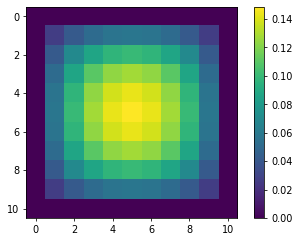

In [15]:
import matplotlib.pyplot as plt  

print("Torsionsfunktion im Trägerquerschnitt :")
print("---------------------------------------")
plt.figure(dpi=70)
color_map = plt.imshow(S)
plt.colorbar()
plt.show() 

xy-Komponente der Schubspannung im Trägerquerschnitt :
------------------------------------------------------


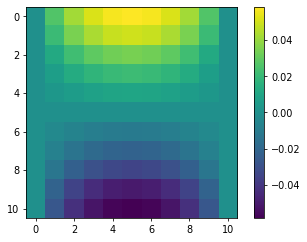

In [16]:
tau_xy = numpy.gradient(S)[0]
tau_xz = -numpy.gradient(S)[1]

print("xy-Komponente der Schubspannung im Trägerquerschnitt :")
print("------------------------------------------------------")
plt.figure(dpi=70)
color_map = plt.imshow(tau_xy)
plt.colorbar()
plt.show() 

xz-Komponente der Schubspannung im Trägerquerschnitt :
------------------------------------------------------


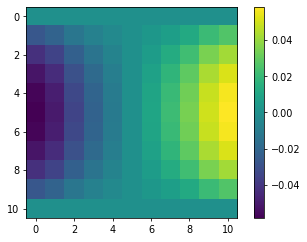

In [17]:
print("xz-Komponente der Schubspannung im Trägerquerschnitt :")
print("------------------------------------------------------")
plt.figure(dpi=70)
color_map = plt.imshow(tau_xz)
plt.colorbar()
plt.show() 

Qualitative Schubspannungsverteilung zufolge Torsion :
------------------------------------------------------


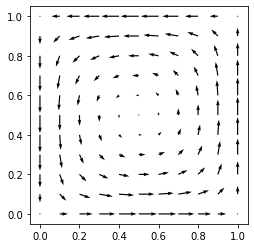

In [18]:
y = numpy.linspace(0, 1, int(length/resolution)+1)
z = numpy.linspace(0, 1, int(length/resolution)+1)

print("Qualitative Schubspannungsverteilung zufolge Torsion :")
print("------------------------------------------------------")
fig, ax = plt.subplots()
q = ax.quiver(y, z, tau_xy, tau_xz)
ax.set_aspect('equal', 'box')
plt.show()